In [1]:
# required imports

import xlrd
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [2]:
# Read the first sheet from the Excel File

file_name = 'Yearwise.xlsx'
wb = xlrd.open_workbook(file_name)
sheet = wb.sheet_by_index(0)

In [3]:
# Some pre-processing to prepare the DataFrame outof the excel file

prefix = 'Cases Reported during the Year (CR) Under Crime against Women in '
suffix = 'During 2001-2015'
state_name = None
key = None
info_list = []
info = dict()

for i in range(sheet.nrows):
    numbers = list()
    for j in range(17):
        value = sheet.cell_value(i, j)
        if type(value) is str and not value.split():
            continue
        if value == 'SL':
            break
        if j == 0 and type(value) is str and 'Cases Reported during the Year' in value:
            state_name = value.replace(prefix, '').replace(suffix, '')
            info['state_name'] = state_name
            break
        if j == 1 and type(value) is str and value.split():
            key = value
            info[key] = None
        if type(value) is float:
            numbers.append(value)
    if numbers:
        info[key] = numbers[1:]
        n_keys = len(list(info.keys()))
        if n_keys == 16:
            info_list.append(info)
            info = dict()

keys = list(info_list[0].keys())
columns = keys.copy()
columns.insert(1,'Year')

final_list = list()

for il in info_list:
    year = 2001
    for i in range(15):
        temp_list = list()
        for k in keys[1:]:
            temp_list.append(il.get(k)[i])
        temp_list.insert(0, il.get('state_name').strip())
        temp_list.insert(1, year)
        year += 1
        final_list.append(temp_list)

In [4]:
# preview the prepared DataFrame

df = pd.DataFrame(final_list, columns=columns)
df.head()

,state_name,Year,Rape,Attempt to commit Rape,Kidnapping & Abduction of Women,Dowry Deaths,Assault on Women with intent to outrage her Modesty,Insult to the Modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls from Foreign Country,Abetment of Suicides of Women,"Dowry Prohibition Act, 1961","Indecent Representation of Women (Prohibition) Act, 1986",Commission of Sati Prevention Act 1987,"Protection of Women from Domestic Violence Act, 2005",Immoral Traffic (Prevention) Act,Total Crimes against Women
0,Andhra Pradesh,2001,871.0,0.0,765.0,420.0,3544.0,2271.0,5791.0,7.0,0.0,551.0,925.0,0.0,0.0,1332.0,16477.0
1,Andhra Pradesh,2002,1002.0,0.0,854.0,449.0,3799.0,2024.0,7018.0,0.0,0.0,460.0,2403.0,0.0,0.0,871.0,18880.0
2,Andhra Pradesh,2003,946.0,0.0,931.0,466.0,4128.0,2286.0,8167.0,5.0,0.0,195.0,909.0,0.0,0.0,349.0,18382.0
3,Andhra Pradesh,2004,1016.0,0.0,1030.0,512.0,3817.0,2310.0,8388.0,2.0,0.0,339.0,1102.0,0.0,0.0,405.0,18921.0
4,Andhra Pradesh,2005,935.0,0.0,995.0,443.0,3595.0,2508.0,8696.0,3.0,0.0,306.0,2657.0,0.0,0.0,681.0,20819.0


In [5]:
# Keeping only the required columns

state_wise_total_crimes = df[['state_name', 'Total Crimes against Women', 'Year']]
data_for_map = state_wise_total_crimes[state_wise_total_crimes['Year']==2015]
data_for_map.head()

,state_name,Total Crimes against Women,Year
14,Andhra Pradesh,15931.0,2015
29,Arunachal Pradesh,384.0,2015
44,Assam,23258.0,2015
59,Bihar,13891.0,2015
74,Chhattisgarh,5720.0,2015


In [6]:
# reading the state wise shapefile of India in a GeoDataFrame and preview it

fp = "Igismap/Indian_States.shp"
map_df = gpd.read_file(fp)
map_df.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [7]:
# Correct spellings of states from out dataframe to match those of GeoDataframe
# I found these 4 names manually

data_for_map['state_name'].iloc[29]  = 'Andaman & Nicobar Island'
data_for_map['state_name'].iloc[1] = 'Arunanchal Pradesh'
data_for_map['state_name'].iloc[31] = 'Dadara & Nagar Havelli'
data_for_map['state_name'].iloc[33] = 'NCT of Delhi'

/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/yaser/anaconda3/envs/MLPracs/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/in

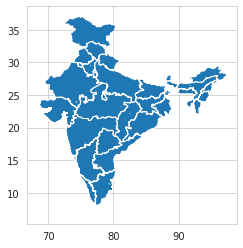

In [8]:
# Plot the default map

map_df.plot()

In [9]:
# Join both the DataFrames by state names

merged = map_df.set_index('st_nm').join(data_for_map.set_index('state_name'))
merged.head()

,geometry,Total Crimes against Women,Year
st_nm,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",136.0,2015
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",384.0,2015
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",23258.0,2015
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",13891.0,2015
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",463.0,2015


In [10]:
# NA check

merged.isna().sum()

geometry                      0
Total Crimes against Women    0
Year                          0
dtype: int64

In [11]:
# Summary to get the max and min value

merged.describe()

,Total Crimes against Women,Year
count,36.000000,36.0
mean,9094.277778,2015.0
std,10817.918542,0.0
min,9.000000,2015.0
25%,317.000000,2015.0
50%,5505.500000,2015.0
75%,15334.000000,2015.0
max,35527.000000,2015.0


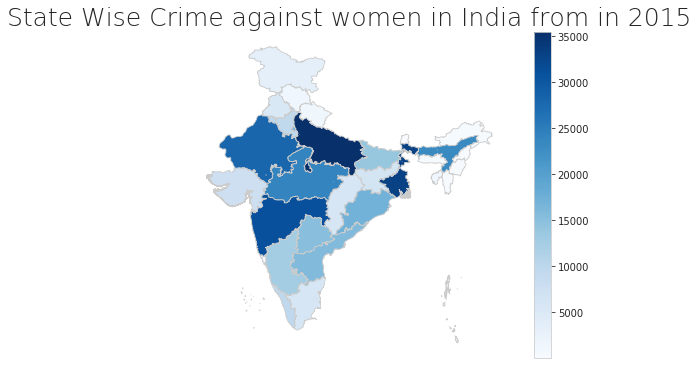

In [12]:
# set the range for the choropleth
vmin, vmax = 9, 35527

# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('State Wise Crime against women in India from in 2015', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# add the colorbar to the figure
cbar = fig.colorbar(sm)
merged.plot(column='Total Crimes against Women', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [13]:
# We save the output as a PNG image

fig.savefig("State_wise.png", dpi=300)

In [14]:
# reading the district wise shapefile of India in a GeoDataFrame and preview it

fp = "gadm36_IND_shp/gadm36_IND_2.shp"
map_df = gpd.read_file(fp)
map_df.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.1_1,Nicobar Islands,None,None,District,District,None,IN.AN.NI,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.2_1,North and Middle Andaman,None,None,District,District,None,IN.AN.NM,"MULTIPOLYGON (((92.93898 12.22386, 92.93916 12..."
2,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.3_1,South Andaman,None,None,District,District,None,IN.AN.SA,"MULTIPOLYGON (((92.47972 10.52056, 92.47945 10..."
3,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.1_1,Anantapur,"Anantpur, Ananthapur",None,District,District,None,IN.AD.AN,"POLYGON ((77.71420 13.76079, 77.71314 13.75074..."
4,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.2_1,Chittoor,Chitoor|Chittor,None,District,District,None,IN.AD.CH,"POLYGON ((78.46293 12.63537, 78.46190 12.63228..."


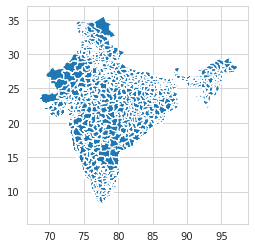

In [15]:
# keep required columns and plot default map

map_df = map_df[['NAME_2', 'geometry']]
map_df.plot()

In [16]:
# read the district wise excel file and preview it

district_wise = pd.read_excel('district_wise.xls')
district_wise.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,State/ UT,Sl. No.,District/ Area,Year,Rape,Attempt to commit Rape,Kidnapping & Abduction_Total,Dowry Deaths,Assault on Women with intent to outrage her Modesty_Total,Insult to the Modesty of Women_Total,Cruelty by Husband or his Relatives,Importation of Girls from Foreign Country,Abetment of Suicides of Women,"Dowry Prohibition Act, 1961","Indecent Representation of Women (P) Act, 1986",Protection of Children from Sexual Offences Act,"Protection of Women from Domestic Violence Act, 2005",Immoral Traffic Prevention Act,Total Crimes against Women
0,Andhra Pradesh,1,Anantapur,2015.0,32.0,15.0,57.0,12.0,325.0,8.0,276.0,0.0,62.0,157.0,0.0,0.0,0.0,8.0,952.0
1,Andhra Pradesh,2,Chittoor,2015.0,31.0,0.0,20.0,10.0,94.0,1.0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,366.0
2,Andhra Pradesh,3,Cuddapah,2015.0,34.0,7.0,17.0,6.0,211.0,82.0,317.0,0.0,3.0,11.0,0.0,0.0,0.0,2.0,690.0
3,Andhra Pradesh,4,East Godavari,2015.0,104.0,19.0,25.0,13.0,574.0,150.0,522.0,0.0,0.0,3.0,9.0,0.0,0.0,19.0,1438.0
4,Andhra Pradesh,5,Guntakal Railway,2015.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
# keeping only the required columns

district_wise = district_wise[['District/ Area', 'Total Crimes against Women']]

In [18]:
# Join both the DataFrames by district names

merged = map_df.set_index('NAME_2').join(district_wise.set_index('District/ Area'))
merged.head()

,geometry,Total Crimes against Women
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",953.0
Agar Malwa,"POLYGON ((76.19970 23.70700, 76.19933 23.70590...",NaN
Agra,"POLYGON ((78.20979 26.83609, 78.21165 26.83846...",1184.0
Ahmadabad,"POLYGON ((71.89120 22.09747, 71.88139 22.09477...",NaN
Ahmadnagar,"POLYGON ((74.83829 18.33893, 74.83713 18.34180...",NaN


In [19]:
# NA Check

merged.isna().sum()

geometry                        0
Total Crimes against Women    185
dtype: int64

##### Seems like there are around 185 district names that are either mispelled or missing
##### I am not going to do correct these manually instead we will impute them with the mean (even though that will make our data incorrect but the propose of this notebook is to show you how to use GeoPandas to plot District wise stats on the Map of India)

In [20]:
# Impute missing values by mean 

merged['Total Crimes against Women'].fillna(merged['Total Crimes against Women'].mean(), inplace=True)
merged.isna().sum()

geometry                      0
Total Crimes against Women    0
dtype: int64

In [21]:
# summary

merged.describe()

,Total Crimes against Women
count,676.000000
mean,422.541752
std,381.837646
min,0.000000
25%,194.750000
50%,422.541752
75%,452.500000
max,4073.000000


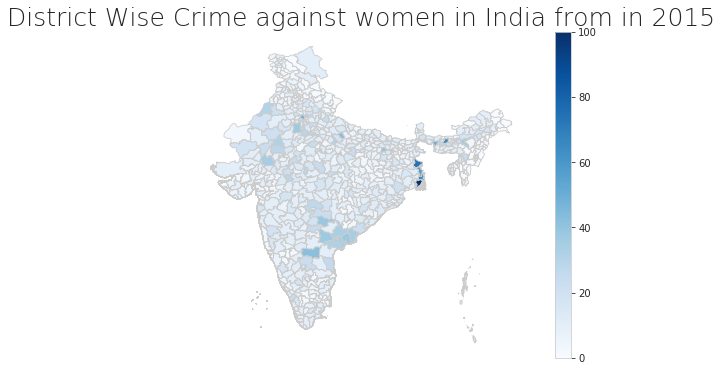

In [22]:
# set the range for the choropleth
vmin, vmax = 0, 100

# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('District Wise Crime against women in India from in 2015', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# add the colorbar to the figure
cbar = fig.colorbar(sm)
merged.plot(column='Total Crimes against Women', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

##### Looking at the map we can say something is surely wrong with the data
##### But, as said earlier our purpose is to demonstrate how to  plot District wise stats on the Map of India

In [23]:
# We save the output as a PNG image

fig.savefig("District_wise.png", dpi=300)

* Reference: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

* Data: https://data.gov.in/catalog/district-wise-crimes-committed-against-women?filters%5Bfield_catalog_reference%5D=87613&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc